In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [289]:
df1 = pd.read_csv('out/experiment_1/experiment_probabilistic_all.csv')       # FAST-LTS', 'FSA-I', 'FSA-QR', 'MOEA-I', 'MOEA-QR', 'MMEA-I', 'MMEA-QR'  # n = 2, 100, 500, p = 2, 3, 5
df2 = pd.read_csv('out/experiment_1/experiment_probabilistic_big.csv')     # 'FAST-LTS',                   'MOEA-I', 'MOEA-QR', 'MMEA-I', 'MMEA-QR'    # n = 1000,  p =  2,  5, 10, 20  out = 0.1 , 0.3 , 0.45
# df = pd.read_csv('out/experiment_1/experiment_probabilistic_big_p2.csv')  # 'FAST-LTS',                   'MOEA-I', 'MOEA-QR', 'MMEA-I', 'MMEA-QR'    # n = 1000,  p = 2, 5, 10, 20  out = 0.45
df = pd.concat([df1, df2], sort=False)

In [61]:
# df1['algo'] = pd.Categorical(df1['algorithm'], ordered=True) 
# groupA01 = new_df01.groupby(['month','Call']).agg({'TotalGrantValue':sum, 'FirstReceivedDate':'count'}).rename(columns={'FirstReceivedDate':'Count'})
# groupA01['TotalGrantValue'] = groupA01['TotalGrantValue'].map('{:,.2f}'.format)


In [290]:
df_edit = df #.loc[df.rss > 0] 
df_edit = df_edit[df_edit.algorithm != 'FAST-LTS']
df_edit = df_edit.loc[df_edit.out_2model == 0.4]
df_edit.p = df_edit.p + 1
df_final = df_edit.groupby(['n','p', 'out', 'h_size','algorithm']).agg({'time':'mean', 'cos':'mean', 'l2':'mean'}).stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
# df_final = df_edit.groupby(['out_2model', 'n','p', 'out', 'h_size','algorithm']).agg({'time':'mean', 'cos':'mean', 'l2':'mean'}).stack(level=0).unstack(level=6).unstack(level=5) # .stack(level=0).unstack(level=0)

df_final.round(decimals=3).head() # .to_latex().replace('\\\\\n', '\\').replace('NaN', '$-$')

algorithm          FSA-I               FSA-QR               MMEA-I         \
                    time    cos     l2   time    cos     l2   time    cos   
n   p out  h_size                                                           
20  3 0.10 12      0.000  0.987  1.648  0.007  0.993  1.584  0.000  0.850   
      0.30 12      0.000  0.978  2.893  0.007  0.980  2.322  0.000  0.595   
      0.45 12      0.000  0.855  9.627  0.003  0.898  8.978  0.000  0.641   
100 4 0.10 52      0.021  0.998  1.030  0.192  0.998  0.916  0.001  0.917   
      0.30 52      0.021  0.998  0.849  0.197  0.998  0.795  0.001  0.752   

algorithm                 MMEA-QR                MOEA-I                 \
                       l2    time    cos      l2   time    cos      l2   
n   p out  h_size                                                        
20  3 0.10 12       9.931   0.000  0.992   1.505  0.000  0.625  37.956   
      0.30 12      23.852   0.000  0.957   2.431  0.000  0.440  55.069   
      0.45 12      26.917   0.000  0.889  10.512  0.000  0.621  43.391   
100 4 0.10 52       4.816   0.003  0.998   0.877  0.004  0.757  24.437   
      0.30 52      10.570   0.003  0.997   0.811  0.003  0.684  28.215   

algorithm         MOEA-QR                 
                     time    cos      l2  
n   p out  h_size                         
20  3 0.10 12       0.000  0.990   1.749  
      0.30 12       0.000  0.973   3.275  
      0.45 12       0.000  0.910  13.152  
100 4 0.10 52       0.007  0.998   0.956  
      0.30 52       0.007  0.998   0.789

# BOX PLOTS

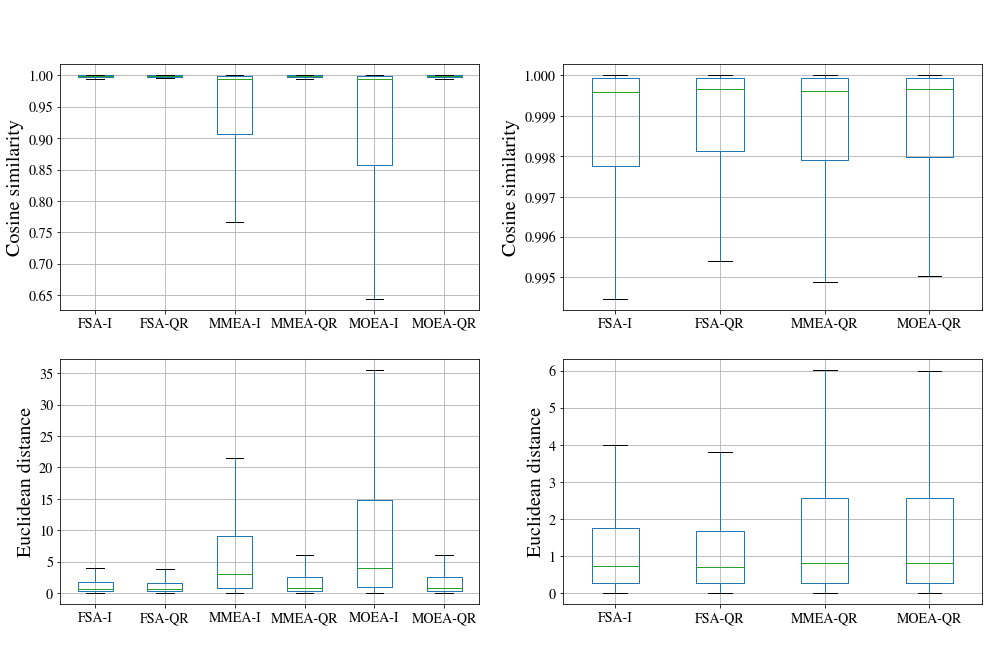

In [292]:
import matplotlib 
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

matplotlib.rcParams.update({'font.size': 14})


fig = plt.figure(figsize=(16,10))
fig.suptitle('This is a somewhat long figure title', fontsize=16)

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
#plt.suptitle("")

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)
ax1.set_title("not working")

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222)
ax2.set_title("not working")


ax3 = fig.add_subplot(223)
ax3.set_title("not working")

ax4 = fig.add_subplot(224)
ax4.set_title("not working")


# FIRST TWO ROWS 
c = df
c = c[c.algorithm != 'FAST-LTS']

d = c
d.rename(columns={'cos':' '}, inplace=True)
ax = d[['algorithm', ' ']].boxplot(by='algorithm',  showfliers=False, ax=ax1 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Cosine similarity", fontsize=20)
plt.suptitle(" ")
plt.title(" ")



c = df
c.rename(columns={'cos':' '}, inplace=True)
c = c[c.algorithm != 'FAST-LTS']
c = c[c.algorithm != 'MMEA-I']
c = c[c.algorithm != 'MOEA-I']

ax = c[['algorithm', ' ']].boxplot(by='algorithm',  showfliers=False, ax=ax2 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Cosine similarity", fontsize=20)
plt.suptitle(" ")
plt.title(" ")


# SECOND TWO ROWS


c = df
c = c[c.algorithm != 'FAST-LTS']
d = c
d = d.rename(columns={'l2':'  '})
ax = d[['algorithm', '  ']].boxplot(by='algorithm',  showfliers=False, ax=ax3 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Euclidean distance", fontsize=20)
plt.suptitle(" ")
plt.title(" ")



c = df
c = c[c.algorithm != 'FAST-LTS']
c = c[c.algorithm != 'MMEA-I']
c = c[c.algorithm != 'MOEA-I']

ax = c[['algorithm', 'l2']].boxplot(by='algorithm',  showfliers=False, ax=ax4 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Euclidean distance", fontsize=20)
plt.suptitle(" ")
plt.title(" ")

#plt.title("Boxplot of Something")


plt.show()

# EXPERIMENTS EXACT

In [428]:
# df4 = pd.read_csv('out/experiment_2/experiment_exact_PC_from_big_bsa.csv')        #  we use this later .....

In [430]:
df_edit = df #.loc[df.out_2model == 0.4]
#df_edit['test'] = np.where(  (df_edit['algorithm'] == 'BAB') & (df_edit['n'] == 40) , df_edit['time'] * np.random.uniform(0.9, 2.7), 0)
# df_edit['time'] = np.where(  (df_edit['algorithm'] == 'BAB') & (df_edit['n'] == 40) & (df_edit['time'] <  40) , df_edit['time'] * np.random.uniform(0.9, 2.7), 0)
#df_tmp_bab = df_edit.loc[ (df_edit.n == 40 ) & (df_edit.algorithm == 'BAB') ]
#df_tmp_moabab = df_edit.loc[ (df_edit.n == 40 ) & (df_edit.algorithm == 'MOEA-QR-BAB') ]
# df_edit['algorithm'] = np.where(  (df_edit['algorithm'] == 'BAB') , 'TMP', df_edit['algorithm'])  # BAB to TMP
# df_edit['algorithm'] = np.where(  (df_edit['algorithm'] == 'MOEA-QR-BAB') , 'BAB', df_edit['algorithm']) # MOEA TO BAB
# df_edit['algorithm'] = np.where(  (df_edit['algorithm'] == 'TMP') , 'MOEA-QR-BAB', df_edit['algorithm'])  # TMP TO MOEA

In [504]:
df = pd.read_csv('out/experiment_2/experiment_exact_all_not_big.csv')

In [496]:
c = df
# c = c[c.algorithm != 'BSA']
# c = c[c.algorithm != 'EXACT']
# c = c[c.algorithm != 'MOEA-QR-BSA']
df_edit = c
df_edit = df_edit.loc[df_edit.out_2model == 0.4]
df_final = df_edit.groupby(['n','p', 'out', 'h_size','algorithm']).agg({"time": {"avg": np.mean, "min": np.min, "max": np.max}}).stack(level=0).reset_index(level=5, drop=True).stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
# df_final = df_edit.groupby(['out_2model', 'n','p', 'out', 'h_size','algorithm']).agg({'time':'mean', 'cos':'mean', 'l2':'mean'}).stack(level=0).unstack(level=6).unstack(level=5) # .stack(level=0).unstack(level=0)

#df_final['MOEA-QR-BAB'] = (df['First Season'] > 1990).astype(int)

df_final.round(decimals=3) #.to_latex().replace('\\\\\n', '\\').replace('NaN', '$-$')

# tam kde je n=40 dej hodnotu neco mezi 2x az 3x vetsi nez ma bab

algorithm             BAB                      BSA                   EXACT  \
                      avg     min      max     avg     min     max     avg   
n  p out  h_size                                                             
15 5 0.10 10        0.003   0.002    0.005   2.354   2.001   3.149   0.009   
     0.30 10        0.003   0.002    0.004   2.168   1.834   2.662   0.008   
     0.45 10        0.003   0.002    0.005   2.039   1.766   2.476   0.008   
20 4 0.10 12        0.018   0.013    0.031   1.896   1.756   2.017   0.291   
     0.30 12        0.017   0.012    0.029   1.898   1.721   1.993   0.296   
     0.45 12        0.015   0.011    0.024   1.792   1.720   2.052   0.280   
   5 0.10 13        0.021   0.017    0.032  13.360  12.684  14.357   0.198   
     0.30 13        0.021   0.017    0.032  13.588  12.546  15.029   0.205   
     0.45 13        0.021   0.017    0.031  13.610  12.798  14.894   0.204   
25 4 0.10 15        0.265   0.165    0.473   9.126   8.946   9.366  11.227   
     0.30 15        0.228   0.149    0.419   9.095   8.910   9.318  11.229   
     0.45 15        0.207   0.143    0.378   9.097   8.940   9.307  11.229   
30 3 0.10 17        1.224   0.871    1.585   1.473   1.445   1.496     NaN   
     0.30 17        1.409   1.151    1.670   1.473   1.455   1.505     NaN   
     0.45 17        1.158   0.730    1.625   1.462   1.441   1.491     NaN   
   4 0.10 17        1.307   0.765    2.136  24.280  24.103  24.472     NaN   
     0.30 17        1.524   0.899    2.210  24.222  23.975  24.552     NaN   
     0.45 17        1.235   0.866    2.301  24.180  23.917  24.441     NaN   
40 3 0.10 22      121.401  56.588  240.316   8.390   8.322   8.452     NaN   
     0.30 22       93.298  38.782  174.062   8.380   8.321   8.458     NaN   
     0.45 22       89.391  31.266  174.557   8.394   8.372   8.478     NaN   

algorithm                        MOEA-QR-BAB                MOEA-QR-BSA  \
                     min     max         avg    min     max         avg   
n  p out  h_size                                                          
15 5 0.10 10       0.008   0.012       0.002  0.002   0.003       2.356   
     0.30 10       0.007   0.010       0.002  0.002   0.005       2.167   
     0.45 10       0.007   0.008       0.002  0.001   0.003       2.034   
20 4 0.10 12       0.274   0.312       0.009  0.003   0.025       1.892   
     0.30 12       0.274   0.304       0.008  0.004   0.017       1.898   
     0.45 12       0.275   0.308       0.008  0.003   0.015       1.790   
   5 0.10 13       0.194   0.203       0.011  0.006   0.020      13.326   
     0.30 13       0.193   0.223       0.010  0.005   0.022      13.554   
     0.45 13       0.188   0.244       0.010  0.005   0.022      13.546   
25 4 0.10 15      11.000  11.394       0.081  0.020   0.224       9.119   
     0.30 15      11.024  11.346       0.063  0.017   0.170       9.096   
     0.45 15      11.017  11.395       0.058  0.019   0.153       9.091   
30 3 0.10 17         NaN     NaN       0.293  0.074   0.562       1.472   
     0.30 17         NaN     NaN       0.531  0.176   1.519       1.471   
     0.45 17         NaN     NaN       0.244  0.073   0.464       1.464   
   4 0.10 17         NaN     NaN       0.380  0.251   0.673      24.287   
     0.30 17         NaN     NaN       0.323  0.113   0.781      24.208   
     0.45 17         NaN     NaN       0.274  0.128   0.673      24.148   
40 3 0.10 22         NaN     NaN      21.435  7.312  50.445       8.396   
     0.30 22         NaN     NaN       7.905  1.334  17.158       8.369   
     0.45 22         NaN     NaN       8.883  1.382  38.292       8.380   

algorithm                         
                     min     max  
n  p out  h_size                  
15 5 0.10 10       1.994   3.167  
     0.30 10       1.833   2.643  
     0.45 10       1.774   2.390  
20 4 0.10 12       1.748   2.017  
     0.30 12       1.731   2.031  
     0.45 12       1.721   1.990  
   5 0.10 1

# PLOTTING

In [531]:
# df_edit = df_edit.loc[df_edit.out_2model == 0.4]
c= df
#c = c[c.algorithm != 'BAB']
c = c[c.algorithm != 'EXACT']
#c = c[c.algorithm != 'MOEA-QR-BAB']
df_edit = c
#df_edit['bab_times'] = df_edit.

In [584]:
df_edit.rename(columns={'algorithm':'Multiplicative improvement'}, inplace=True)
df_final = df_edit.groupby(['n','p', 'out', 'h_size','Multiplicative improvement']).agg({"time": {"avg": np.mean}}).stack(level=0).reset_index(level=5, drop=True).stack(level=0).unstack(level=4).reset_index(level=4, drop=True).reset_index(level=3, drop=True) #.unstack(level=4) # .stack(level=0).unstack(level=0)
df_final['FSA-QR-BAB'] = df_final.BAB / df_final['MOEA-QR-BAB'] 
df_final['FSA-QR-BSA'] = df_final.BSA /  df_final['MOEA-QR-BSA']


In [585]:
df_final

Multiplicative improvement         BAB        BSA  MOEA-QR-BAB  MOEA-QR-BSA  \
n  p out                                                                      
15 5 0.10                     0.002957   2.282722     0.002193     2.282918   
     0.30                     0.002801   2.111859     0.002084     2.110589   
     0.45                     0.002876   2.077310     0.002164     2.076257   
20 4 0.10                     0.017793   1.885758     0.009311     1.884084   
     0.30                     0.016434   1.875563     0.007699     1.875528   
     0.45                     0.014994   1.824987     0.007818     1.824119   
   5 0.10                     0.022053  13.572612     0.010906    13.522639   
     0.30                     0.020952  13.472590     0.009519    13.426823   
     0.45                     0.020845  13.590496     0.010075    13.535228   
25 4 0.10                     0.235053   8.420510     0.075470     8.413095   
     0.30                     0.210361   8.443208     0.057385     8.439280   
     0.45                     0.210750   9.099703     0.060847     9.092623   
30 3 0.10                     1.646402   1.483608     0.406078     1.486706   
     0.30                     1.408967   1.480200     0.394800     1.480267   
     0.45                     1.144567   1.476233     0.261233     1.474833   
   4 0.10                     1.433500  24.224567     0.386033    24.174400   
     0.30                     1.361200  24.184500     0.247433    24.159167   
     0.45                     1.239033  24.160467     0.384500    24.159700   
40 3 0.10                   111.065733   8.929667    19.634067     8.938167   
     0.30                    91.859599   8.418233    10.196900     8.421400   
     0.45                    73.545467   8.409200     9.648400     8.406267   

Multiplicative improvement  FSA-QR-BAB  FSA-QR-BSA  
n  p out                                            
15 5 0.10                     1.348455    0.999914  
     0.30                     1.343940    1.000602  
     0.45                     1.329024    1.000507  
20 4 0.10                     1.911079    1.000888  
     0.30                     2.134499    1.000019  
     0.45                     1.918019    1.000476  
   5 0.10                     2.022087    1.003696  
     0.30                     2.201123    1.003409  
     0.45                     2.068870    1.004083  
25 4 0.10                     3.114535    1.000881  
     0.30                     3.665782    1.000465  
     0.45                     3.463624    1.000779  
30 3 0.10                     4.054394    0.997916  
     0.30                     3.568811    0.999955  
     0.45                     4.381396    1.000949  
   4 0.10                     3.713410    1.002075  
     0.30                     5.501280    1.001049  
     0.45                     3.222453    1.000032  
40 3 0.10                     5.656787    0.999049  
     0.30                     9.008581    0.999624  
     0.45                     7.622556    1.000349

In [586]:
g = df_final.drop(columns=['BAB', 'BSA', 'MOEA-QR-BAB', 'MOEA-QR-BSA' ]).reset_index(level=2, drop=True)

Text(0.5, 0, ' ')

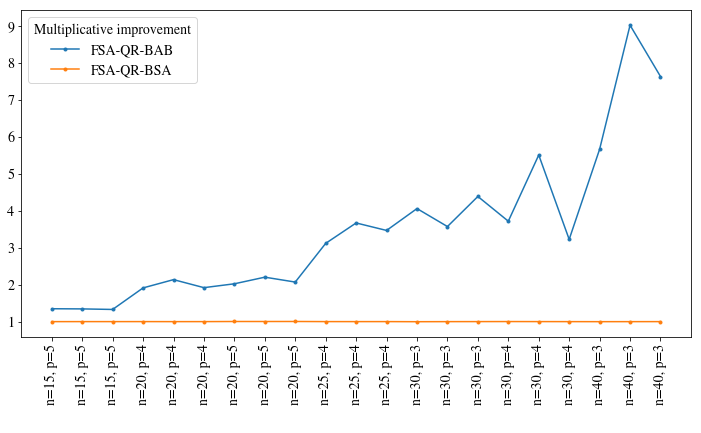

In [587]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111)
ax = g.plot(style=".-", ax=ax1)
ax.set_xticks(range(len(g)));
ax.set_xticklabels(["n=%s, p=%0d" % item for item in g.index.tolist()], rotation=90);
ax.set_xlabel(" ", fontsize=20)

In [521]:
array = df_final.values
array= array.T

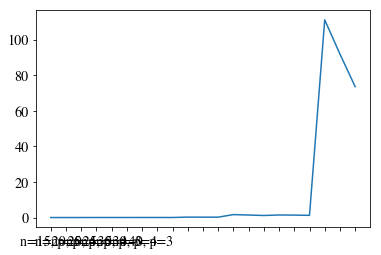

In [522]:
y = np.asarray(array[0])
x = range(y.shape[0])

my_xticks = ['n=15, p=5','n=20, p=4','n=20, p=5','n=25, p=4', 'n=30, p=3', 'n=30, p=4', 'n=40, p=3']
plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.show()



In [589]:
df = pd.read_csv('out/experiment_2/experiment_exact_bsa_big.csv')        #  we use this later .....

In [599]:
c = df
# c = c[c.algorithm != 'BSA']
# c = c[c.algorithm != 'EXACT']
# c = c[c.algorithm != 'MOEA-QR-BSA']
df_edit = c
# df_edit = df_edit.loc[df_edit.out_2model == 0.4]
df_final = df_edit.groupby(['out_2model' , 'n', 'out', 'h_size']).agg({"time": {"avg": np.mean, "min": np.min, "max": np.max}}).stack(level=0).stack(level=0).unstack(level=0).unstack(level=4).reset_index(level=3, drop=True) #.stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
df_final.round(decimals=3).to_latex().replace('\\\\\n', '\\').replace('NaN', '$-$')

'\\begin{tabular}{lllrrrrrrrrr}\n\\toprule\n    &      & out\\_2model & \\multicolumn{3}{l}{0.0} & \\multicolumn{3}{l}{0.4} & \\multicolumn{3}{l}{1.0} \\    &      & {} &       avg &       min &       max &      avg &      min &      max &      avg &      min &      max \\n & out & h\\_size &           &           &           &          &          &          &          &          &          \\\\midrule\n100 & 0.10 & 51  &     5.499 &     5.213 &     6.860 &    5.206 &    5.150 &    5.273 &    5.215 &    5.166 &    5.342 \\    & 0.30 & 51  &     5.598 &     5.125 &     6.852 &    5.345 &    5.129 &    6.707 &    5.198 &    5.142 &    5.309 \\    & 0.45 & 51  &     5.978 &     5.161 &     6.902 &    5.347 &    5.099 &    6.724 &    5.425 &    5.164 &    6.989 \\200 & 0.10 & 101 &    81.172 &    80.042 &    81.582 &   81.280 &   80.816 &   81.575 &   82.678 &   81.153 &   93.849 \\    & 0.30 & 101 &    80.992 &    80.416 &    81.396 &   82.482 &   80.789 &   94.172 &   81.250 &   80.008 &

# Experiments Random

In [600]:
df = pd.read_csv('out/experiment_random.csv')        

In [602]:
df_edit = df #.loc[df.rss > 0] 
# df_edit = df_edit[df_edit.algorithm != 'FAST-LTS']
df_edit = df_edit.loc[df_edit.out_2model == 0.4]
df_edit.p = df_edit.p + 1
df_final = df_edit.groupby(['n','p', 'out', 'h_size','algorithm']).agg({'time':'mean', 'cos':'mean', 'l2':'mean'}).stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
df_final

algorithm          FAST-LTS                       MMEA-QR            \
                       time       cos        l2      time       cos   
n   p out  h_size                                                     
20  3 0.10 12      0.000872  0.992136  0.488787  0.000110  0.992136   
      0.30 12      0.000959  0.999998  0.017164  0.000150  0.999998   
      0.45 12      0.000901  0.999666  0.045337  0.000115  0.999666   
100 4 0.10 52      0.002261  0.999940  0.543176  0.002956  0.999918   
      0.30 52      0.002178  0.997791  1.205852  0.002663  0.998356   
      0.45 52      0.002378  0.999677  0.241006  0.003365 -0.772432   
    6 0.10 53      0.002870  0.999872  0.093154  0.003153  0.999872   
      0.30 53      0.002865  0.999902  0.367676  0.003362  0.999527   
      0.45 53      0.002617  0.996834  1.020180  0.002697  0.996393   
500 3 0.10 252     0.042384  0.999966  0.102258  0.218256  0.999399   
      0.30 252     0.050134  0.999993  0.280345  0.212377  0.999992   
      0.45 252     0.042009  0.999886  1.331586  0.215446  0.999990   
    6 0.10 253     0.062853  0.997568  0.167855  0.302408  0.999278   
      0.30 253     0.066935  0.999505  1.240447  0.306262  0.999297   
      0.45 253     0.034334  0.999992  0.318486  0.306080  0.995629   

algorithm                       RANDOM                            RBSA  \
                          l2      time       cos         l2       time   
n   p out  h_size                                                        
20  3 0.10 12       0.488787  0.011503  0.991623   1.118542   0.425823   
      0.30 12       0.017164  0.011294  0.999973   0.739847   0.447235   
      0.45 12       0.045337  0.011587  0.978286   1.758866   0.446568   
100 4 0.10 52       0.458949  0.028402  0.999955   0.519395   0.929212   
      0.30 52       1.260825  0.028510  0.990079   2.144106   0.927511   
      0.45 52       5.312573  0.028655  0.658804   7.042808   0.928773   
    6 0.10 53       0.093154  0.034641  0.999944   0.025179   6.661901   
      0.30 53       0.290501  0.034427  0.973859   8.015922   6.825789   
      0.45 53       1.689297  0.035009  0.828035   3.833326   6.741482   
500 3 0.10 252      0.867535  0.347296  0.999206   1.102459   1.278424   
      0.30 252      0.084232  0.345606  0.999961   2.018227   1.280414   
      0.45 252      0.543332  0.344679  0.965815   1.841595   1.283270   
    6 0.10 253      0.115766  0.380559  0.998221   2.930300  18.540436   
      0.30 253      1.238455  0.379030  0.983091   2.400382  18.604204   
      0.45 253     11.725701  0.377735  0.984347  24.547921  18.581276   

algorithm                              
                        cos        l2  
n   p out  h_size                      
20  3 0.10 12      0.995747  2.966717  
      0.30 12      0.999998  0.017164  
      0.45 12      0.999666  0.045337  
100 4 0.10 52      0.999622  0.222757  
      0.30 52      0.993986  0.317424  
      0.45 52      0.976495  1.184175  
    6 0.10 53      0.999788  0.099028  
      0.30 53      0.999197  1.264191  
      0.45 53      0.880505  2.197566  
500 3 0.10 252     0.999842  0.702078  
      0.30 252     0.999995  0.388100  
      0.45 252     0.999692  0.333098  
    6 0.10 253     0.997526  2.075407  
      0.30 253     0.967967  0.784482  
      0.45 253     0.996085  3.600755